# logistic回归

1.利用Logistic回归进行分类的主要思想是：根据现有的数据对分类的主要思想：根据现有数据对分类界限建立回归公式，以此进行分类。

    这里的“回归”一词主要源于最佳拟合，表示要找到最佳拟合参数集。训练分类器时的做法就是找到最佳拟合参数，使用的是最优化算法。
    
    最优化算法包括基本的：梯度上升法和一个改进的随机梯度上升法。
    
    下面介绍的是“二值型”输出分类器的数学原理。

2.Logistic回归的一般过程

    (1)收集数据：采用任意方法收集数据。
    (2)准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。
    (3)分析数据：采用任意方法对数据进行分析。
    (4)**训练算法：大部分时间将用于训练，训练的目的是为了找到最佳分类的回归系数。（寻找最佳拟合参数，最优化算法）
    (5)测试算法：一旦训练步骤完成，分类将会很快
    (6)使用算法：首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。

3.基于Logistic回归和Sigmoid函数的分类

    优点：计算代价不高，易于理解和实现
    缺点：容易欠拟合，分类精度可能不高
    适用数据类型：数值型和标称型数据
    
    sigmoid函数：
    f(z) = 1/(1+exp(-z)),
    z = w0x0+w1x1+w2x2+....+wnxn,也记做z=wTx,  其中x为分类器的输入数据，向量w为我们寻找的最佳参数，从而使得分类器尽可能的精准。

4.基于最优化方法的最佳回归系数确定

4.1 梯度上升法

    梯度上升法基于的思想是：要找到某函数的最大值，最好的方法就是沿着该函数的梯度方向探寻。
    w := w+alpha*f'(w)

    梯度下降法：w := w-alpha*f'(w)
    
    梯度上升法的伪代码：
    每个回归系数初始化为1
    重复R次：
        计算整个数据集的梯度
        使用alpha*gradient更新回归系数的向量
        返回回归系数
     
    全部计算完之后再整体更新

In [1]:
import numpy as np
def loadDataSet():
    dataMat=[];labelMat=[]
    fr = open('D:\AGAME\MachineLearning\machinelearninginaction\Ch05/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [2]:
def gradAsccent(dataMatIn,classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()#转换成numpy矩阵，之前是向量。transpose()为转置
    m,n = np.shape(dataMatIn)
    alpha = 0.001#步长
    maxCycles = 500 #循环次数
    weights = np.ones((n,1)) #初始化
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat-h)
        weights = weights+alpha*dataMatrix.transpose()*error
    return weights

In [3]:
dataMat,labelMat = loadDataSet()
weights = gradAsccent(dataMat,labelMat)
print(weights)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


4.2分析数据：画出决策边界

In [4]:
import matplotlib.pyplot as plt
def plotBestFit(weights):
    dataMat,labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1=[];ycord1=[]
    xcord2=[];ycord2=[]
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]);ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]);ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1');plt.ylabel('X2')
    plt.show()

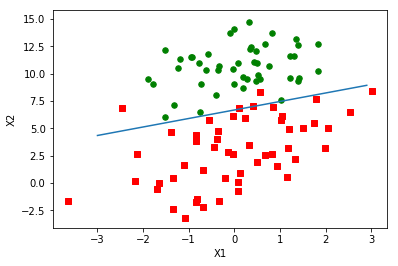

In [5]:
dataMat,labelMat = loadDataSet()
weights = gradAsccent(dataMat,labelMat)
weights = weights.getA() #将矩阵转换为数组，如果不转，矩阵中的元素无法取出
plotBestFit(weights)

4.3训练算法：随机梯度上升
    
    梯度上升算法在每次更新回归参数时都需要遍历整个数据集。
    改进的方法是：一次仅用一个样本点来更新参数，该方法称为随机梯度上升算法。由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个在线学习算法。与“在线学习”相对应，一次处理所有数据被称为“批处理”。
    
    随机梯度上升算法的伪代码：
    对所有的回归系数初始化为1
    对数据集中每个样本
        计算该样本的梯度
        使用alpha*gradient更新回归参数
    返回回归系数

In [6]:
def stocGradAscent0(dataMatrix,classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i]-h
        weights = weights+alpha*error*dataMatrix[i]
    return weights

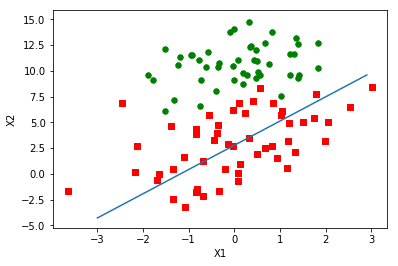

In [7]:
dataMatrix,classLabels = loadDataSet()
weights = stocGradAscent0(np.array(dataMatrix),classLabels)
plotBestFit(weights)

4.4改进的随机梯度上升算法

In [8]:
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01 #alpha在每次迭代时都会调整
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex]-h
            weights = weights+alpha*error*dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

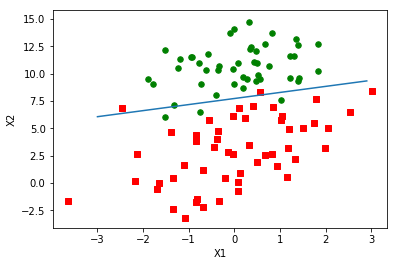

In [9]:
dataMatrix,classLabels = loadDataSet()
weights = stocGradAscent1(np.array(dataMatrix),classLabels)
plotBestFit(weights)

5.从疝气病症预测病马的死亡率

    （1）收集数据：给定数据集
    （2）准备数据：用Python解析文本文件，并填充缺失值
    （3）分析数据：可视化并观察数据
    （4）训练算法：使用优化算法，找到最佳系数
    （5）测试算法：为了量化回归的效果，需要观察错误率。根据错误率决定是否退回到训练阶段，通过改变迭代的次数和步长等参数来得到更好的回归系数。
    （6）使用算法：实现一个简单的命令行程序来收集马的症状并输出预测结果。

5.1准备数据：处理数据中的缺失值

    对于数据之中的缺失值，有下面一些可选的做法：
    1.使用可用特征的均值来填补缺失值
    2.使用特殊值来填补缺失值，如-1
    3.忽略有缺失值的样本
    4.使用相似样本的均值来填补缺失值
    5.使用另外的机器学习算法预测缺失值

5.2测试算法：用Logistic回归进行分类

In [10]:
def classifierVector(inX,weights):
    prob = sigmoid(sum(inX*weights))
    if prob>0.5:
        return 1.0
    else:
        return 0.0

In [11]:
def colicTest():
    frTrain = open('D:\AGAME\MachineLearning\machinelearninginaction\Ch05/horseColicTraining.txt')
    frTest = open('D:\AGAME\MachineLearning\machinelearninginaction\Ch05/horseColicTest.txt')
    trainingSet = [];trainingLabels=[]
    for line in frTrain.readlines():
        currLine=line.strip().split('\t')
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount=0;numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifierVector(np.array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print("the error rate of this test is:%f"%errorRate)
    return errorRate      

In [12]:
def multiTest():
    numTests = 10;errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is:%f"%(numTests,errorSum/float(numTests)))    

In [13]:
multiTest()

D:\ASoftWare\PYTHON3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


the error rate of this test is:0.358209
the error rate of this test is:0.417910
the error rate of this test is:0.432836
the error rate of this test is:0.343284
the error rate of this test is:0.373134
the error rate of this test is:0.328358
the error rate of this test is:0.268657
the error rate of this test is:0.283582
the error rate of this test is:0.507463
the error rate of this test is:0.358209
after 10 iterations the average error rate is:0.367164
